# PRCP-1021-InsCostPred

## Problem Statement

### Dataset Description 

## Business case : To predict the insurance price charged to the customer

In [216]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [84]:
#Loading the data
insurance_dataset = pd.read_csv('.\Data\datasets_13720_18513_insurance(1).csv')

### Basic checks

In [85]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
insurance_dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [91]:
insurance_dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [90]:
insurance_dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory data analysis

### Univariate Analysis 

                                             |                                             | [  0%]   00:00 ->…


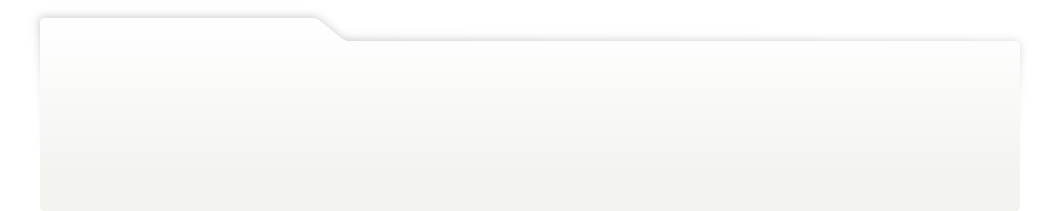
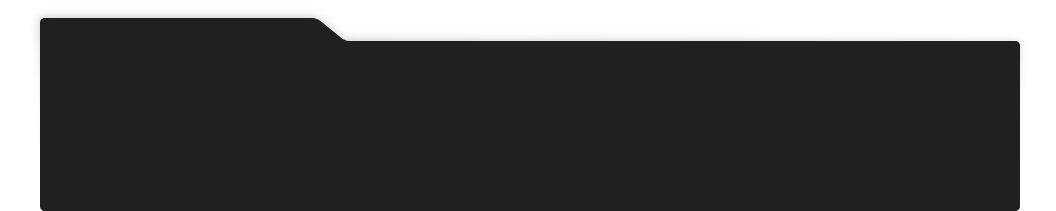
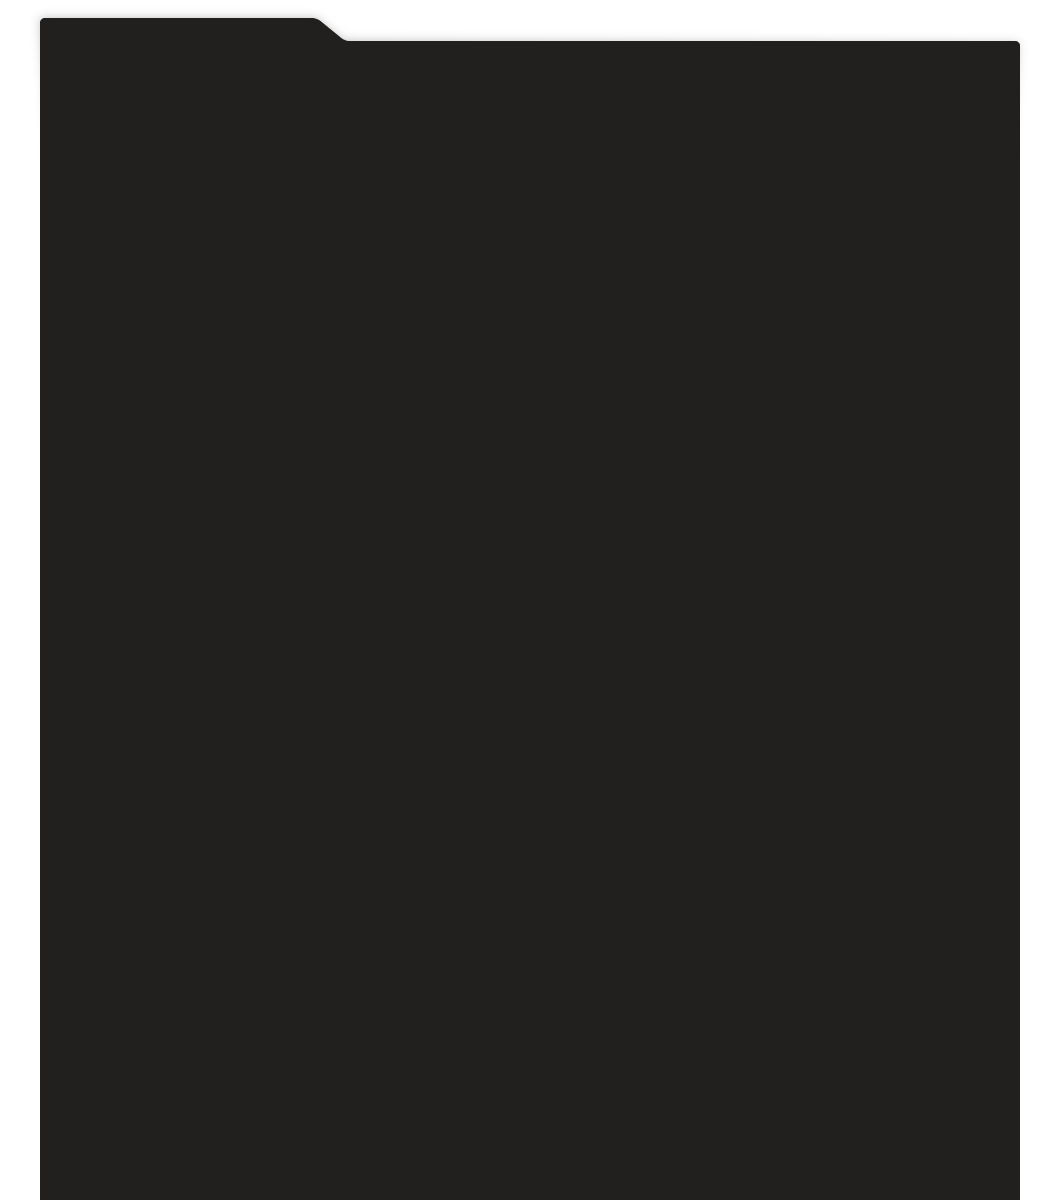
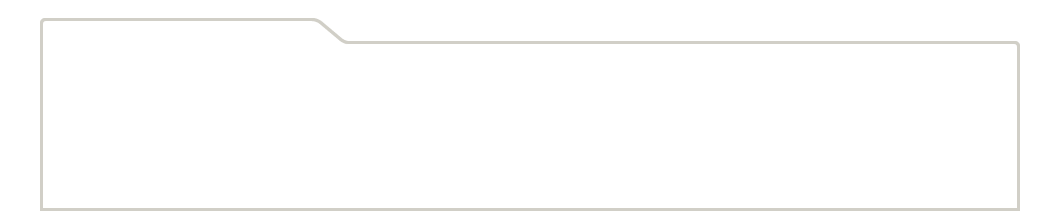
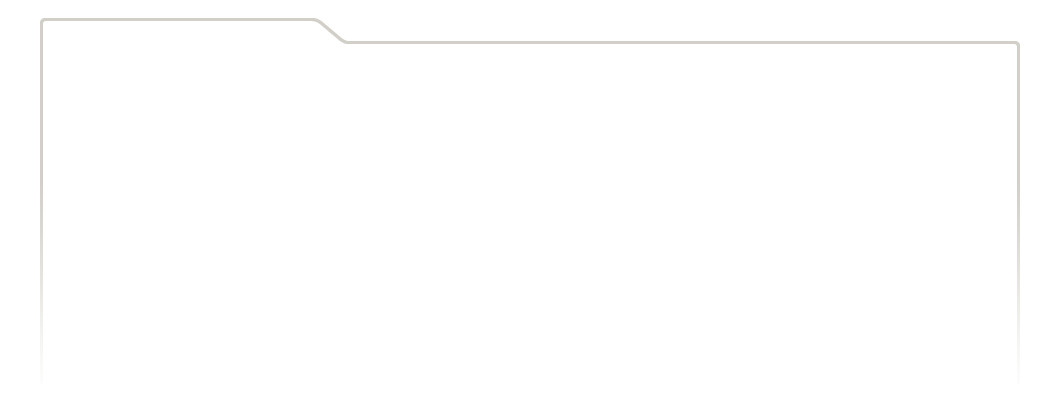
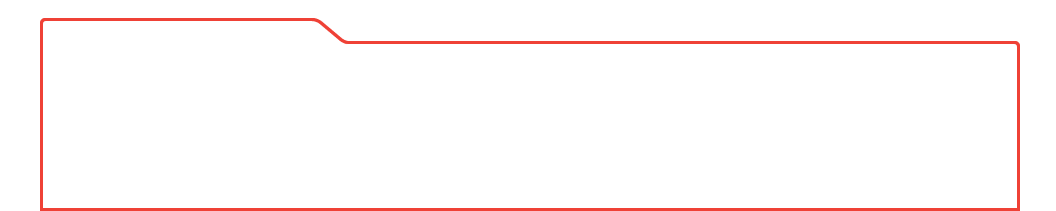
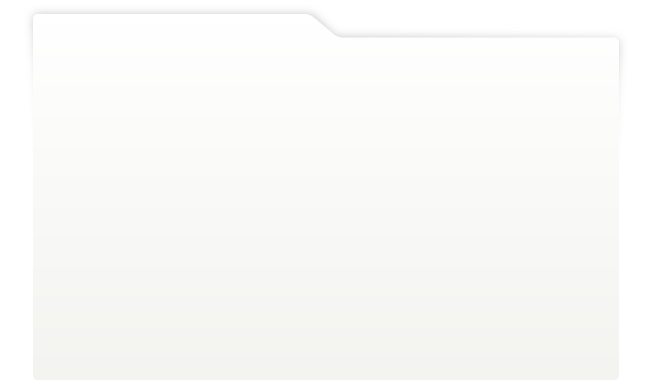
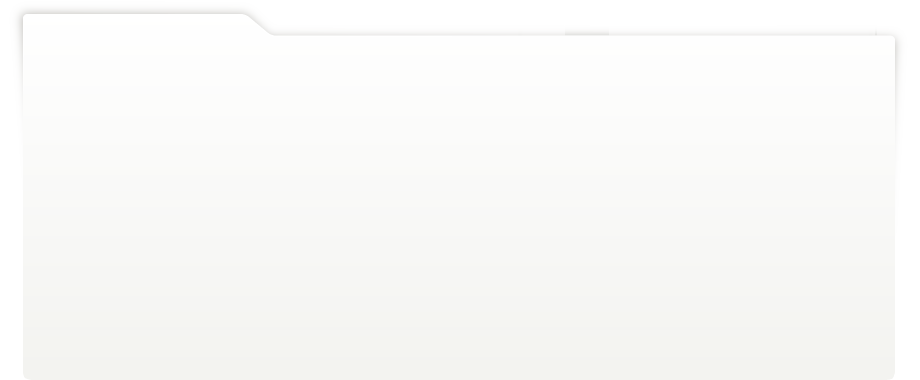
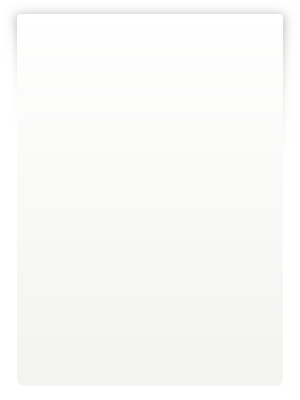
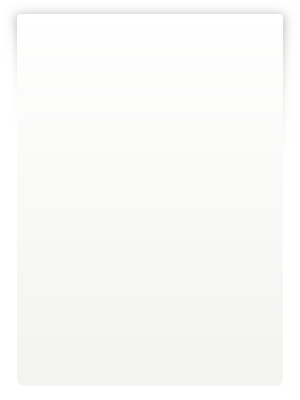
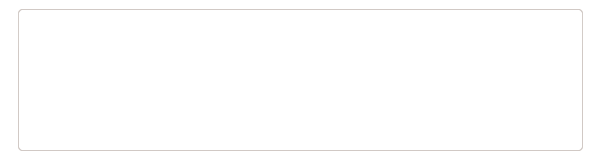
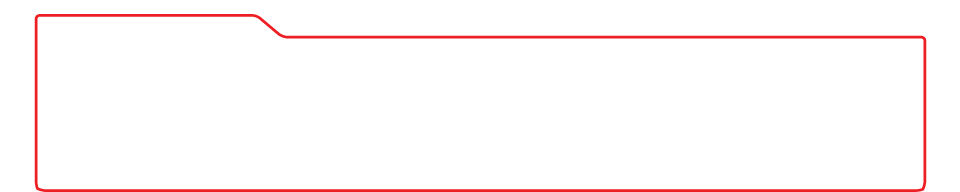
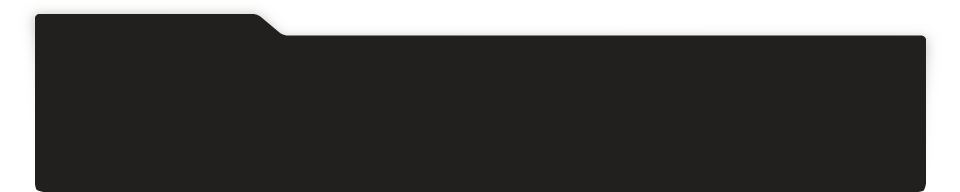
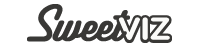
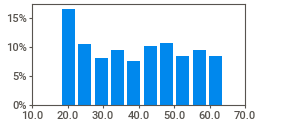
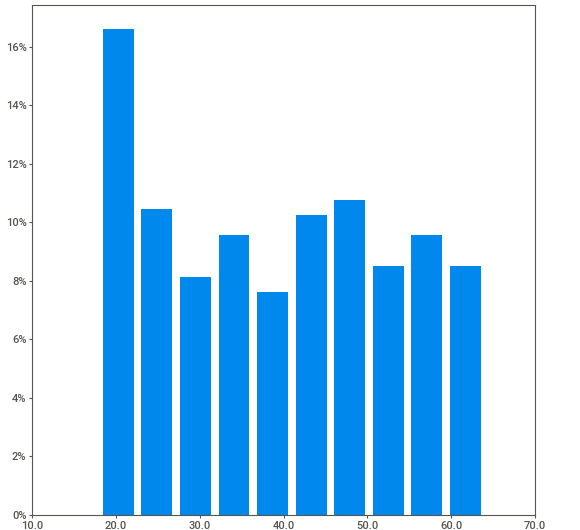
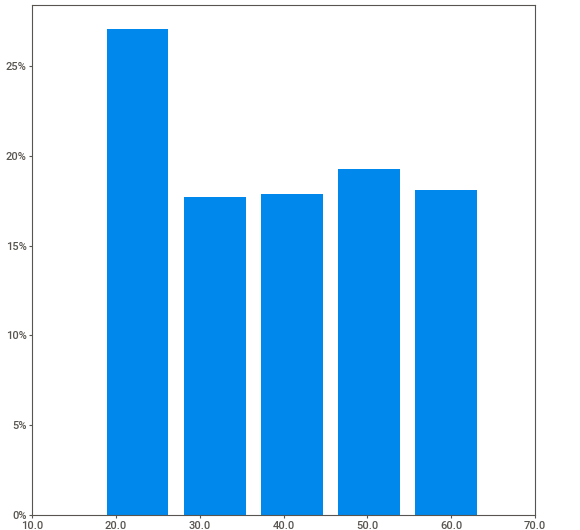
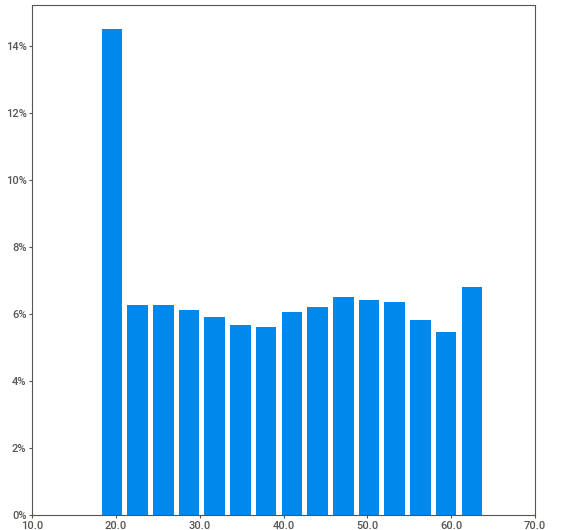
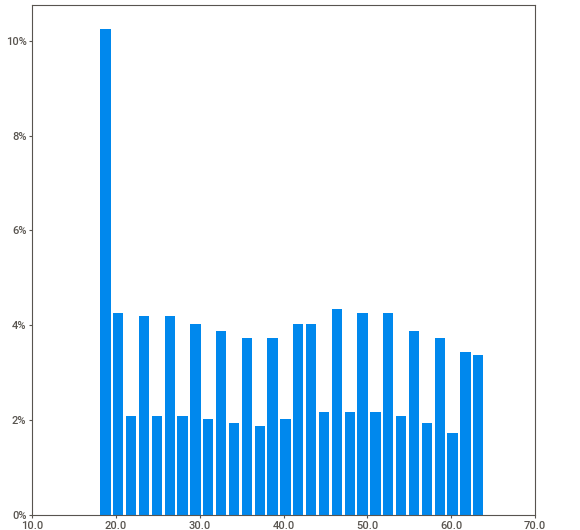
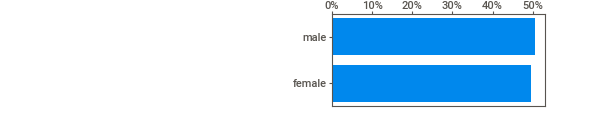
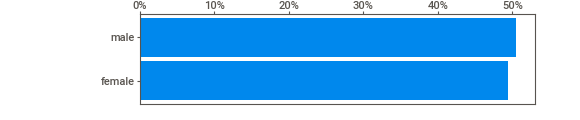
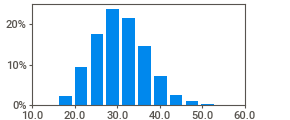
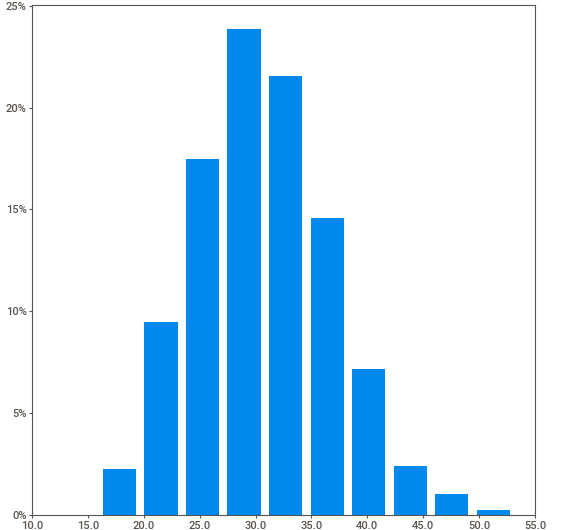
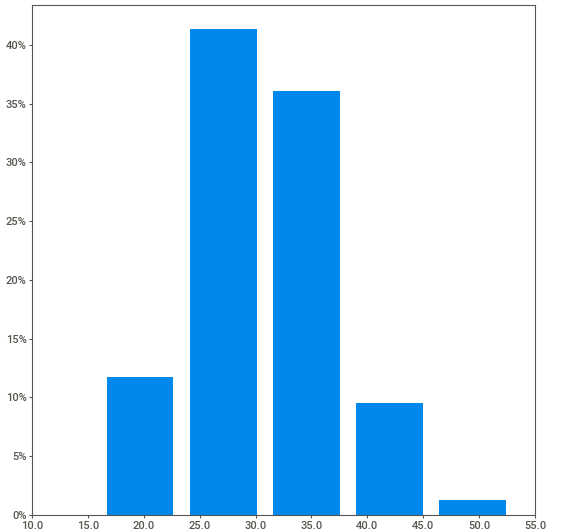
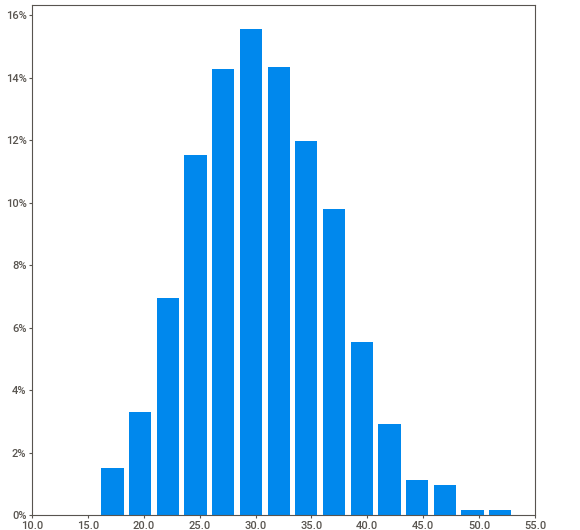
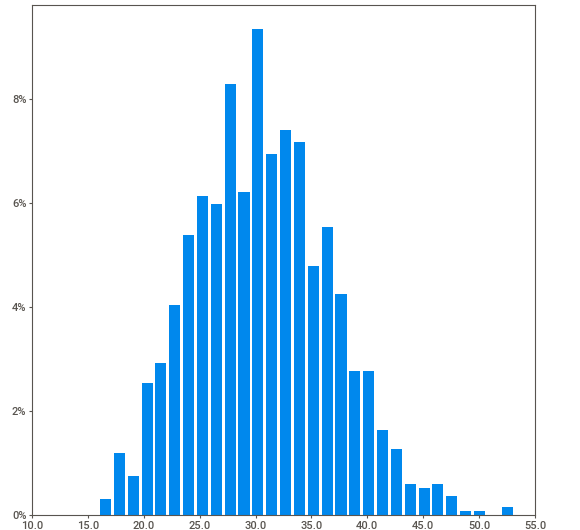
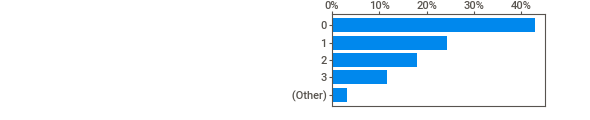
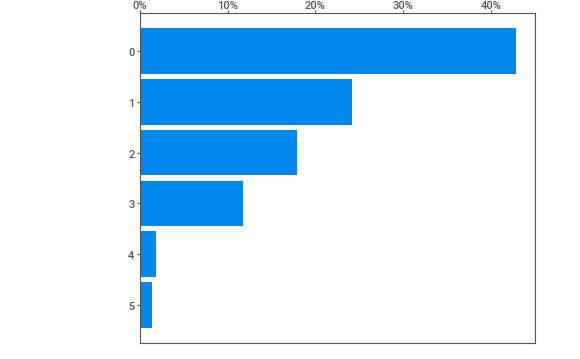
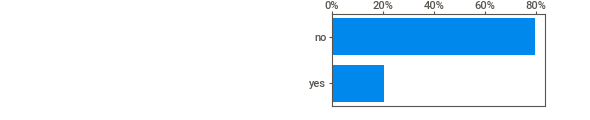
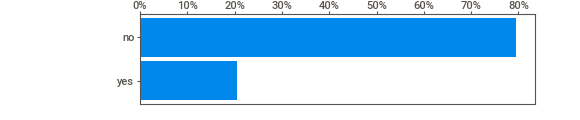
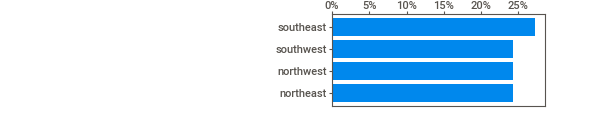
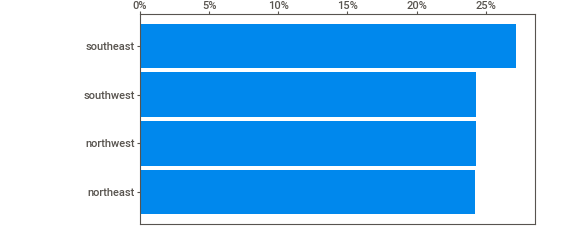
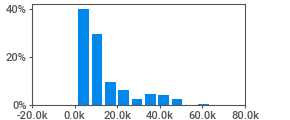
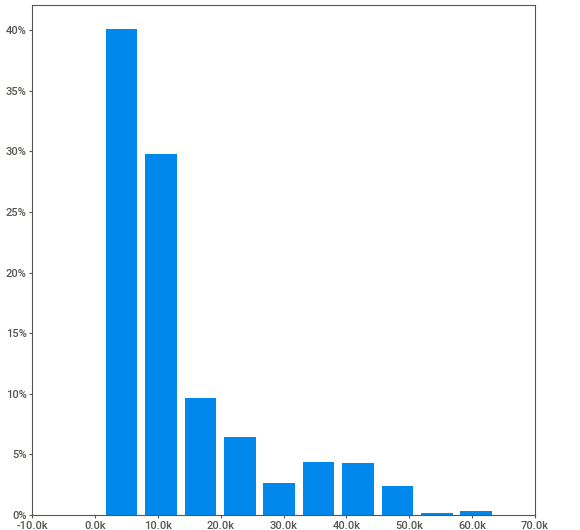
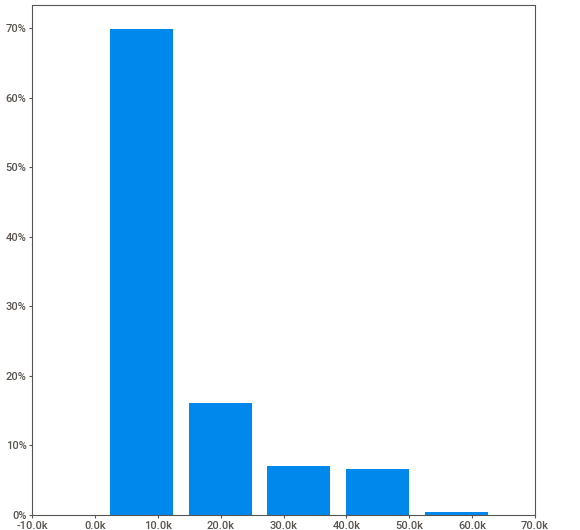
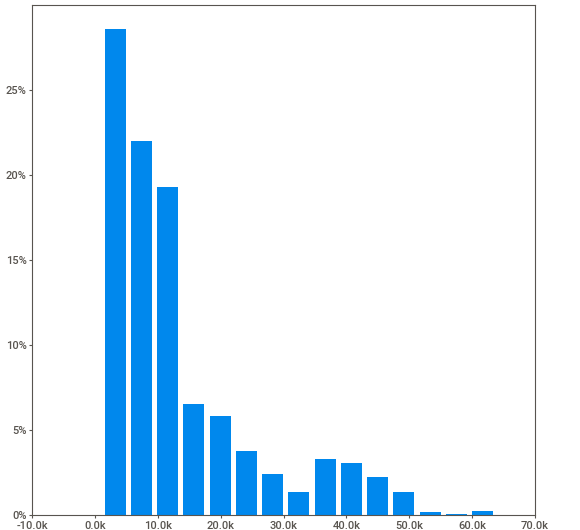
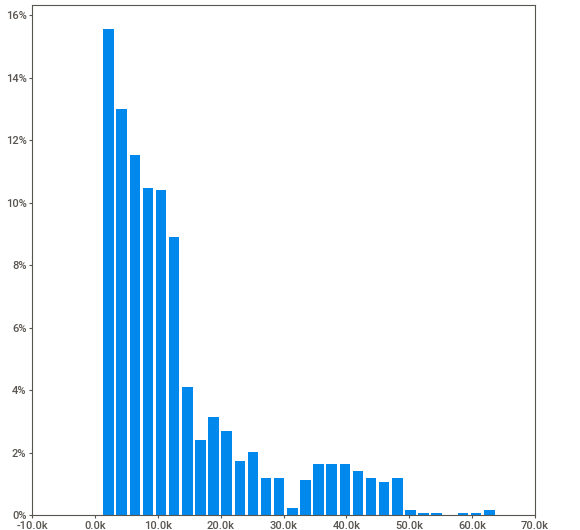
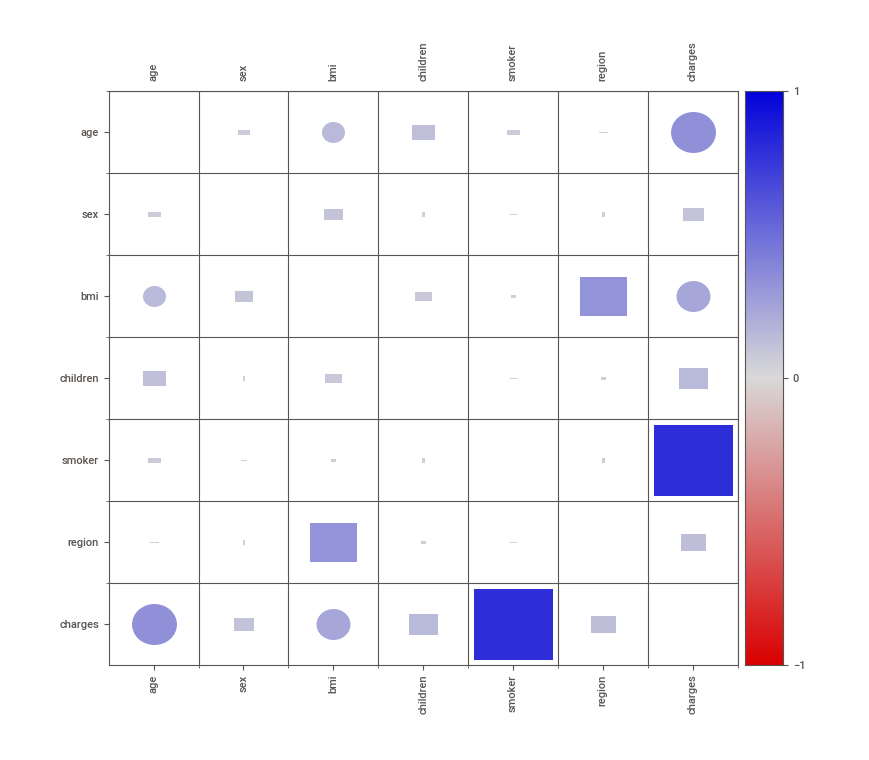
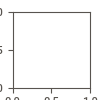

In [221]:
# Using Automated library for univariate analysis
import sweetviz as sv
my_report = sv.analyze(insurance_dataset)
my_report.show_notebook()

In [70]:
insurance_dataset['children'].unique

array([0, 1, 3, 2, 5, 4], dtype=int64)

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

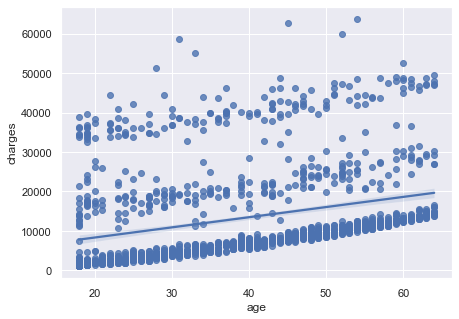

In [218]:
#Analyzing age column with respect to target charges column
plt.figure(figsize=(7,5))
sns.regplot(x= 'age',y='charges', data=insurance_dataset)

<AxesSubplot:xlabel='sex', ylabel='charges'>

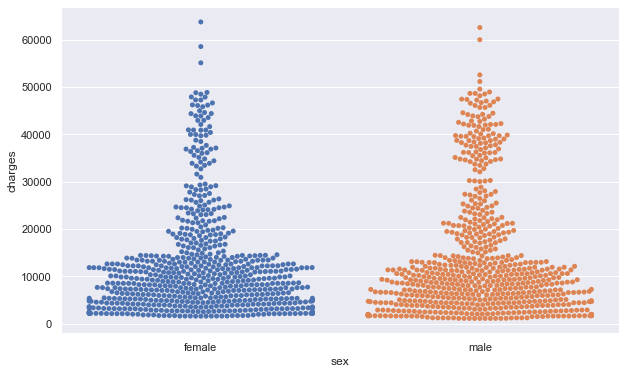

In [219]:
#Analyzing sex with respect to target charges
plt.figure(figsize =(10, 6))
sns.swarmplot(x= 'sex',y='charges', data=insurance_dataset)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

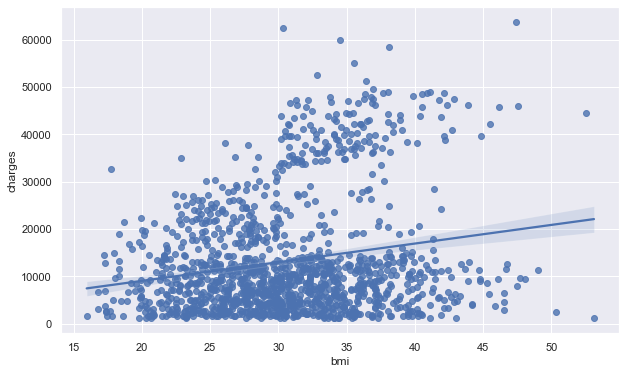

In [220]:
#Analyzing age column with respect to target charges column
plt.figure(figsize =(10, 6))
sns.regplot(x= 'bmi',y='charges', data=insurance_dataset)

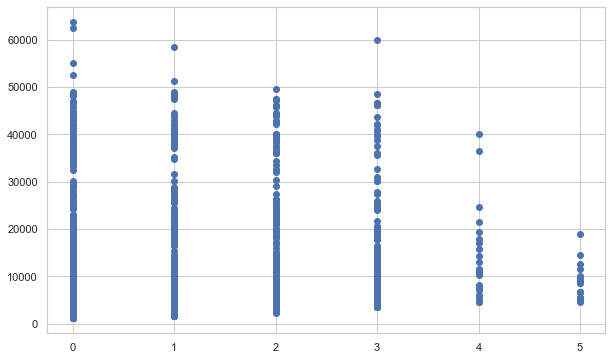

In [215]:
plt.figure(figsize =(10, 6))
plt.scatter(insurance_dataset['children'],insurance_dataset['charges'])